# Ciencia de Datos I<a class="tocSkip">
## Electiva Procesamiento de Señales I <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

---

# Ejemplo: Separación entre las letras J y Q

En este ejemplo se diseña un clasificador simple que clasifique una de las dos letras 'J' y 'Q'.

Se define entomces dos clases: la clase 0 para la letra J, y la clase 1 para la letra Q.



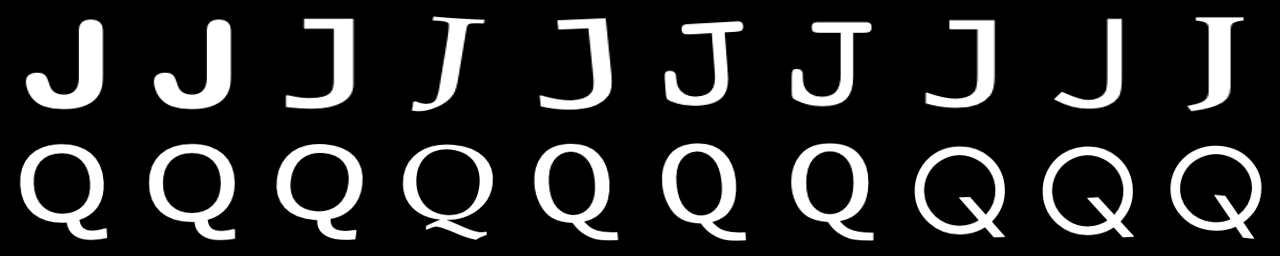

# 0. Setup inicial

Liberías necesarias para que funcione el algoritmo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy.ndimage import binary_fill_holes
import seaborn as sns
import wget
from zipfile import ZipFile
import requests

# 1. Carga de Imágenes

Hay 50 imágenes por letra. 

* Las imágenes de la letra J están almacenadas en char_01_xxx.png

* Las imágenes de la letra Q están almacenadas en char_02_xxx.png

donde xxx = 001, 002, ..., 050

In [2]:
with ZipFile('C:\ClasesUPC_2023_2\EL453-ElectivaProcesamientoSeñales_1\Clases_2023_1\Semana_2\Clase_3/example.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ClasesUPC_2023_2\\EL453-ElectivaProcesamientoSeñales_1\\Clases_2023_1\\Semana_2\\Clase_3/example.zip'

In [6]:
# Funciones necesarias para que se pueda cargar una imagen individual

def num2fixstr(x,d):
  # example num2fixstr(2,5) returns '00002'
  # example num2fixstr(19,3) returns '019'
  st = '%0*d' % (d,x)
  return st

def ImageLoad(prefix,num_char,num_img,echo='off'):
  # img = ImageLoad('example/char_',1,3)   loads image 'example/char_01_003.png'
  # img = ImageLoad('example/char_',2,15)  loads image 'example/char_02_015.png'
  st   = prefix + num2fixstr(num_char,2) + '_' + num2fixstr(num_img,3) + '.png'
  if echo == 'on':
    print('loading image '+st+'...')
  img    = plt.imread(st)
  return img



loading image example/char_01_003.png...


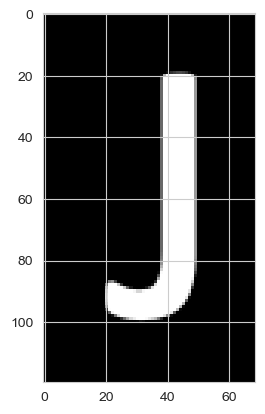

In [7]:
# Lectura de una imagen J
fig    = plt.figure()
ax     = fig.add_subplot(111)
img    = ImageLoad('example/char_',1,3,echo='on')
implot = plt.imshow(img,cmap='gray') 


loading image example/char_02_043.png...


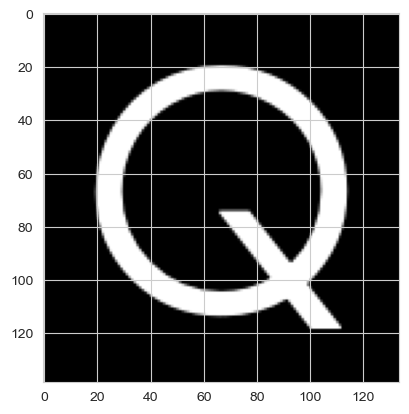

In [8]:
# Lectura de una imagen Q
fig    = plt.figure()
ax     = fig.add_subplot(111)
img    = ImageLoad('example/char_',2,43,echo='on')
implot = plt.imshow(img,cmap='gray') 


# 2. Extracción de Características

In [9]:
# La letra Q es más grande en pixeles que la letra J
# La característica a extraer es el area normalizada, definida como el numero de
# pixeles de la letra (rellena, sin agujeros) dividido por el número de pixeles de la 
# imagen. Esta característica es un número entre 0 y 1, es invariante al tamaño 
# y además invariante a la rotación.

def AreaNormalizada(img,echo='off'):
  R = img>0.5                          # segmentacion, R ahora es una imagen binaria
  R = binary_fill_holes(R).astype(int) # imagen con relleno de agujeros
  CharArea = np.sum(R)                 # area de la letra en pixeles
  ImgArea  = R.shape[0]*R.shape[1]     # numero de pixeles de la imagen
  AreaN = CharArea/ImgArea             # area normalizada
  if echo=='on':
    implot = plt.imshow(R,cmap='gray') 
    print('Area normalizada = '+str(AreaN))
  return AreaN

loading image example/char_01_013.png...
Area normalizada = 0.14596909327871904


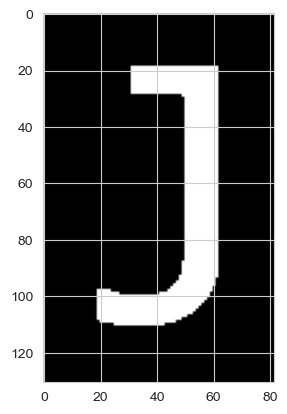

In [10]:
# Ejemplo de esta característica para una letra J

imgJ = ImageLoad('example/char_',1,13,echo='on')
AreaNJ = AreaNormalizada(imgJ,echo='on')


loading image example/char_02_019.png...
Area normalizada = 0.3671683046683047


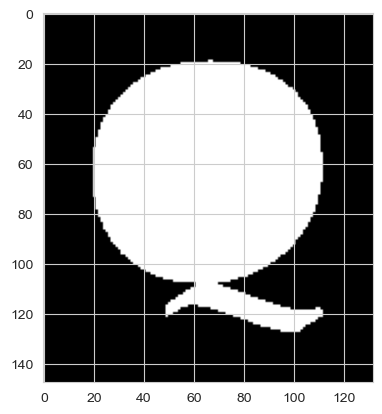

In [11]:
# Ejemplo de esta característica para una letra Q

imgQ = ImageLoad('example/char_',2,19,echo='on')
AreaNQ = AreaNormalizada(imgQ,echo='on')


In [12]:
# Extracción de la característica AreaNormalizada en todas las imágenes
# Clase 0 = 'J' : Clase 1 = 'Q'

K = 2  # número de clases
N = 50 # número de imágenes por clase

X = np.zeros((N,K))

for j in range(K):     # para cada clase
  for i in range(N):   # para cada imagen de la clase
    # Lectura de la imagen
    img    = ImageLoad('example/char_',j+1,i+1,echo='on')
    # Extracción de característica
    X[i,j] = AreaNormalizada(img)


loading image example/char_01_001.png...
loading image example/char_01_002.png...
loading image example/char_01_003.png...
loading image example/char_01_004.png...
loading image example/char_01_005.png...
loading image example/char_01_006.png...
loading image example/char_01_007.png...
loading image example/char_01_008.png...
loading image example/char_01_009.png...
loading image example/char_01_010.png...
loading image example/char_01_011.png...
loading image example/char_01_012.png...
loading image example/char_01_013.png...
loading image example/char_01_014.png...
loading image example/char_01_015.png...
loading image example/char_01_016.png...
loading image example/char_01_017.png...
loading image example/char_01_018.png...
loading image example/char_01_019.png...
loading image example/char_01_020.png...
loading image example/char_01_021.png...
loading image example/char_01_022.png...
loading image example/char_01_023.png...
loading image example/char_01_024.png...
loading image ex

In [13]:
# Definición de conjuntos de training y testing

# Training: las primeras 40 letras de cada clase
X0_train = X[0:40,0]
X1_train = X[0:40,1]

# Testing: las ultimas 10 letras de cada clase
X0_test = X[40:50,0]
X1_test = X[40:50,1]

# Estadísticas del Training
x0_max = np.max(X0_train)
x1_max = np.max(X1_train)

x0_min = np.min(X0_train)
x1_min = np.min(X1_train)

x0_mean = np.mean(X0_train)
x1_mean = np.mean(X1_train)

print('Estadísticas de la caracteristica extraida en el Training:')

print('Clase 0 (J):')
print('>>>> min  = '+str(x0_min))
print('>>>> mean = '+str(x0_mean))
print('>>>> max  = '+str(x0_max))
print(' ')
print('Clase 1 (Q):')
print('>>>> min  = '+str(x1_min))
print('>>>> mean = '+str(x1_mean))
print('>>>> max  = '+str(x1_max))



Estadísticas de la caracteristica extraida en el Training:
Clase 0 (J):
>>>> min  = 0.10405257393209201
>>>> mean = 0.13583741636936
>>>> max  = 0.18533823079277625
 
Clase 1 (Q):
>>>> min  = 0.2884090909090909
>>>> mean = 0.3413593768702451
>>>> max  = 0.3788337646605363


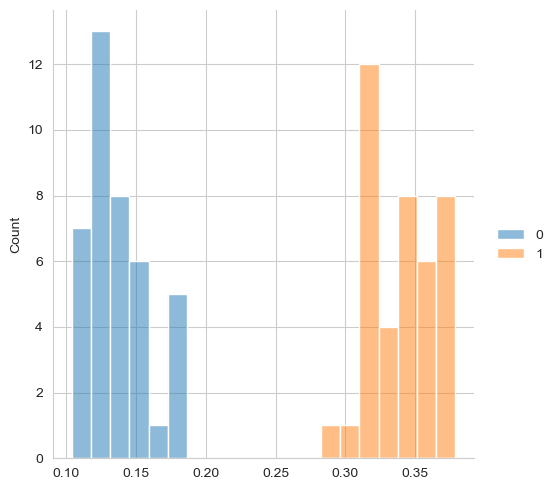

In [14]:
# Distribución de frecuencias por clase
sns.displot([X0_train,X1_train],bins=20)
# en este gráfico se muestra como distribuye la letra J (clase 0 a la izquierda), 
# y la letra Q (clase 1 a la derecha)

# 3. Clasificación

In [15]:
# La clasificación se puede hacer usando un umbral (th) calculado como el
# promedio de las medias de cada clase

th = (x0_mean + x1_mean)/2

print('th = '+str(th))

th = 0.23859839661980253


In [16]:
# Clasificación
Y = (X>th) # Clase 0 es menor o igual que el umbral, Clase 1 es mayor que el umbral 

In [17]:
# Clasificación del conjunto de testing
Y0_test = Y[40:50,0] # clasificación de las letras J de testing
Y1_test = Y[40:50,1] # clasificación de las letras Q de testing


# 4. Evaluación

In [18]:
# Evaluación del conjunto Testing

# Letras bien clasificadas
Jtrue   = np.sum(Y0_test==0) # letras J bien clasificadas
Qtrue   = np.sum(Y1_test==1) # letras Q bien clasificadas

# Letras mal clasificadas
Jfalse  = np.sum(Y0_test==1) # letras J mal clasificadas
Qfalse  = np.sum(Y1_test==0) # letras Q mal clasificadas

# Matriz de confusión MC[i,j] = letras de clase i clasificadas como clase j
MC      = np.zeros((2,2))
MC[0,0] = Jtrue
MC[0,1] = Jfalse
MC[1,0] = Qfalse
MC[1,1] = Qtrue

# Accuracy (% de aciertos)
Acc     = (Jtrue+Qtrue)/(Jtrue+Jfalse+Qfalse+Qtrue)*100

print('Matriz de Confusión:')
print(MC[0,:])
print(MC[1,:])

print('')
print('Accuracy = '+str(Acc)+'%')

Matriz de Confusión:
[10.  0.]
[ 0. 10.]

Accuracy = 100.0%


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).